In [ ]:
from nltk.corpus import stopwords
import os
import nltk
import sklearn
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


In [ ]:
df = pd.read_csv("/content/BC7-LitCovid-Train.csv")
df2 = pd.read_csv("/content/BC7-LitCovid-Dev.csv")

print(df.head)

<bound method NDFrame.head of            pmid  ...                 label
0      32519164  ...   Treatment;Mechanism
1      32691006  ...  Treatment;Prevention
2      32858315  ...           Case Report
3      32985329  ...            Prevention
4      32812051  ...             Treatment
...         ...  ...                   ...
24955  32508388  ...            Prevention
24956  32815519  ...             Diagnosis
24957  32904987  ...   Treatment;Diagnosis
24958  32892181  ...            Prevention
24959  32389144  ...            Prevention

[24960 rows x 9 columns]>


In [ ]:
tokenCounter= 0
for i in range(24960):
  text = df["title"][i] + " " +df["abstract"][i]
  tokens = nltk.tokenize.word_tokenize(text)
  tokenCounter += len(tokens)

In [ ]:
print(tokenCounter)

6168752


In [ ]:
testResults = pd.DataFrame(columns=['Treatment','Diagnosis','Prevention','Mechanism','Transmission','Epidemic Forecasting','Case Report'])

for el in df2["label"]:
  rowList = []
  if "Treatment" in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Diagnosis' in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Prevention' in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Mechanism' in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Transmission' in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Epidemic Forecasting' in el:
    rowList.append(1)
  else:
    rowList.append(0)
  if 'Case Report' in el:
    rowList.append(1)
  else:
    rowList.append(0)

  df_length = len(testResults)
  testResults.loc[df_length] = rowList




In [ ]:
df2["title"][0]

'Potential benefits and risks of omega-3 fatty acids supplementation to patients with COVID-19.'

In [ ]:
print(testResults)

      Treatment Diagnosis  ... Epidemic Forecasting Case Report
0             1         0  ...                    0           0
1             1         0  ...                    0           0
2             0         0  ...                    0           1
3             0         0  ...                    0           0
4             1         0  ...                    0           0
...         ...       ...  ...                  ...         ...
24955         0         0  ...                    0           0
24956         0         1  ...                    0           0
24957         1         1  ...                    0           0
24958         0         0  ...                    0           0
24959         0         0  ...                    0           0

[24960 rows x 7 columns]


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
counterAlpha = 0
counterStopWords =0
cleanedTrainData = dataCleaning(df)
counterAlpha = 0
counterStopWords =0
cleanedTestData = dataCleaning(df2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = stopwords.words('english')
stopwords = set(stopwords)

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    # split string into words (tokens)
    tokens = nltk.tokenize.word_tokenize(text.lower())
    # keep strings with only alphabets
    tokens = [t for t in tokens if t.isalpha()]
    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] 
    tokens = [stemmer.stem(t) for t in tokens]
    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] =(df["title"] + " " +df["abstract"]).apply(tokenize_lemma_stopwords)
    return data

In [ ]:
tokenCounter= 0
for i in range(6238):
  text = cleanedTestData["content"][i]
  tokens = nltk.tokenize.word_tokenize(text)
  tokenCounter += len(tokens)

In [ ]:
print(tokenCounter)

757043


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(cleanedTrainData["content"])

vectorised_test_documents = vectorizer.transform(cleanedTestData["content"])
cleanedTestData["content"][0]

'potenti benefit risk fatti acid supplement patient studi shown infect excess coagul cytokin storm leukopenia lymphopenia hypoxemia oxid stress also observ critic ill sever acut respiratori syndrom coronaviru patient addit onset symptom still approv drug vaccin dietari supplement could possibl improv patient recoveri fatti acid specif eicosapentaeno acid epa docosahexaeno acid dha present effect could amelior patient need intens care unit icu admiss epa dha replac arachidon acid ara phospholipid membran oxid enzym epa dha contribut synthesi inflammatori eicosanoid special lipid mediat spm resolvin maresin protectin thi reduc inflamm contrast studi report epa dha make cell membran suscept oxid mediat reactiv oxygen speci lead format potenti toxic oxid product increas oxid stress although inflammatori resolut improv epa dha could contribut recoveri patient infect fatti acid supplement recommend befor random control trial carri'

In [ ]:
type(vectorised_train_documents[0])

scipy.sparse.csr.csr_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


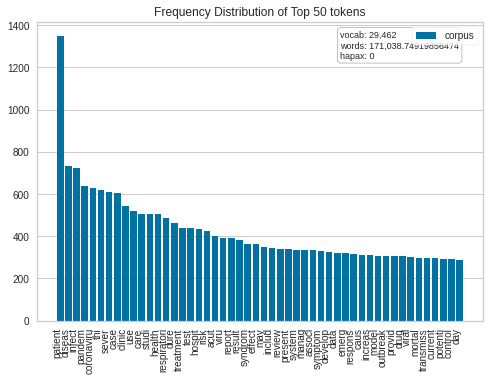

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorised_train_documents)
visualizer.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

for i in range(len(cleanedTrainData["label"])):
  cleanedTrainData["label"][i] = str(cleanedTrainData["label"][i]).split(";")
for i in range(len(cleanedTestData["label"])):
  cleanedTestData["label"][i] = str(cleanedTestData["label"][i]).split(";")

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(cleanedTrainData["label"])
test_labels = mlb.transform(cleanedTestData["label"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
caseReport= 0
Diagnosis =0
Epidemic =0
Mechanism =0
Prevention =0
Transmission = 0
Treatment = 0
for i in range(24960):
  if train_labels[i][0] == 1:
    caseReport +=1
  if train_labels[i][1] == 1:
    Diagnosis +=1
  if train_labels[i][2] == 1:
    Epidemic +=1
  if train_labels[i][3] == 1:
    Mechanism +=1
  if train_labels[i][4] == 1:
    Prevention +=1
  if train_labels[i][5] == 1:
    Transmission +=1
  if train_labels[i][6] == 1:
    Treatment +=1
  


In [ ]:
print(caseReport,
Diagnosis,
Epidemic,
Mechanism,
Prevention,
Transmission,
Treatment)

2063 6193 645 4438 11102 1088 8717


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np
nbClassifier = KNeighborsClassifier()
knn_cv = KNeighborsClassifier()
cv_scores = cross_val_score(knn_cv, vectorised_train_documents, train_labels, cv=5)
#nbClassifier.fit(vectorised_train_documents, train_labels)
knnPredictions = knn_cv.predict_proba(vectorised_test_documents)

NotFittedError: ignored

In [ ]:
print(nbClassifier.classes_)

[0 1 2 3 4 5 6]


In [ ]:
knnPredictions[2]

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [ ]:
predictions

,Treatment,Diagnosis,Prevention,Mechanism,Transmission,Epidemic Forecasting,Case Report
0,0.985214,0.056035,0.003427,0.814219,0.000446,4.234890e-05,0.010759
1,0.005414,0.007420,0.969380,0.000579,0.000076,2.222346e-04,0.000008
2,0.006578,0.003001,0.995043,0.000585,0.000073,1.785484e-05,0.000158
3,0.969774,0.007438,0.001508,0.721617,0.000007,6.002499e-07,0.000020
4,0.828657,0.018961,0.044394,0.104462,0.000004,5.134841e-08,0.000148
...,...,...,...,...,...,...,...
6234,0.002149,0.000574,0.997822,0.000176,0.000016,2.306114e-06,0.000013
6235,0.244515,0.036890,0.089543,0.627320,0.005290,1.591384e-05,0.000120
6236,0.723089,0.108597,0.079587,0.004745,0.000022,3.435083e-07,0.000063
6237,0.026751,0.003624,0.944638,0.000289,0.000146,1.111492e-05,0.001982


In [ ]:
import numpy as np
#[6:Treatment, 4:Prevention, 3:Mechanism, 1:Diagnosis , 2:Epidemic Forecasting , 5:Transmission , 0:Case Report  ]
predictions = pd.DataFrame(np.nan, index=[i for i in range(6239)],columns=["Case Report","Diagnosis","Epidemic Forecasting","Mechanism","Prevention","Transmission","Treatment"])
#predictions = predictions.append(pd.DataFrame(knnPredictions, columns=predictions.columns))
columns=["Case Report","Diagnosis","Epidemic Forecasting","Mechanism","Prevention","Transmission","Treatment"]
for i in range(7):
  for j in range(6239):
    predictions[columns[i]][j] = knnPredictions[i][j][1]


In [ ]:
predictions = predictions[["Treatment","Diagnosis", "Prevention", "Mechanism", "Transmission","Epidemic Forecasting", "Case Report"]]

In [ ]:
predictions

,Treatment,Diagnosis,Prevention,Mechanism,Transmission,Epidemic Forecasting,Case Report
0,1.0,0.0,0.0,0.8,0.0,0.0,0.0
1,0.0,0.0,0.8,0.0,0.0,0.6,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.8,0.2,0.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6234,0.2,0.0,1.0,0.0,0.0,0.0,0.0
6235,0.2,0.0,0.0,1.0,0.4,0.0,0.0
6236,0.6,0.8,0.2,0.0,0.0,0.0,0.0
6237,0.6,0.0,0.6,0.0,0.0,0.0,0.0


In [ ]:
predictions.to_csv("/content/predictions.csv")

In [ ]:
testResults.to_csv("/content/testResults.csv")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

macro_f1 = f1_score(test_labels, knnPredictions, average='macro')

micro_f1 = f1_score(test_labels, knnPredictions, average='micro')
    
hamLoss = hamming_loss(test_labels, knnPredictions)

In [ ]:
print(macro_f1)
print(micro_f1)
print(hamLoss)

0.44898878235452205
0.75883277523406
0.08080507407322603


In [ ]:
!git clone https://github.com/ncbi/biocreative_litcovid.git

Cloning into 'biocreative_litcovid'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 15), reused 12 (delta 4), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
!cd biocreative_litcovid

In [ ]:
!python /content/biocreative_litcovid/biocreative_litcovid_eval.py --gold /content/testResults.csv --pred /content/predictions.csv

validation starts...
validation passes...
label-based measures...
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                      precision    recall  f1-score   support

           Treatment     0.7973    0.8197    0.8083      2207
           Diagnosis     0.7062    0.7820    0.7422      1546
          Prevention     0.8977    0.8647    0.8809      2750
           Mechanism     0.8341    0.6980    0.7600      1073
        Transmission     0.5535    0.3438    0.4241       256
Epidemic Forecasting     0.6725    0.5990    0.6336       192
         Case Report     0.7718    0.3299    0.4622       482

           micro avg     0.8069    0.7650    0.7854      8506
           macro avg     0.7476    0.6339    0.6730      8506
 

In [ ]:
from google.colab import files
files.download('/content/predictions.csv') 